In [1]:
# Let's start with a simple example of the scikit lib use

import sys
sys.path.append('./privatizers')
sys.path.append('./dataProviders')
sys.path.append('./adapters')

from sklearn import tree
from dataProviders import breastCancerDataProvider as dataProvider
from adapters import breastCancerAdapter as adapter

dp = dataProvider.BreastCancerDP()

X = dp.getAllData()
Y = dp.getAllTargets()


In [2]:
## Dataset
data_set = {
    'samples': X,
    'labels': Y
}

[Text(209.25, 203.85, 'X[20] <= 16.795\ngini = 0.468\nsamples = 569\nvalue = [212, 357]'),
 Text(136.01250000000002, 176.67000000000002, 'X[27] <= 0.136\ngini = 0.159\nsamples = 379\nvalue = [33, 346]'),
 Text(78.46875, 149.49, 'X[13] <= 91.555\ngini = 0.03\nsamples = 333\nvalue = [5, 328]'),
 Text(68.00625000000001, 122.31, 'X[13] <= 38.605\ngini = 0.024\nsamples = 332\nvalue = [4, 328]'),
 Text(41.85, 95.13, 'X[14] <= 0.003\ngini = 0.012\nsamples = 319\nvalue = [2, 317]'),
 Text(20.925, 67.94999999999999, 'X[14] <= 0.003\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(10.4625, 40.77000000000001, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(31.387500000000003, 40.77000000000001, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(62.775000000000006, 67.94999999999999, 'X[21] <= 33.27\ngini = 0.006\nsamples = 312\nvalue = [1, 311]'),
 Text(52.3125, 40.77000000000001, 'gini = 0.0\nsamples = 292\nvalue = [0, 292]'),
 Text(73.2375, 40.77000000000001, 'X[21] <= 33.56\ngini = 0.095\n

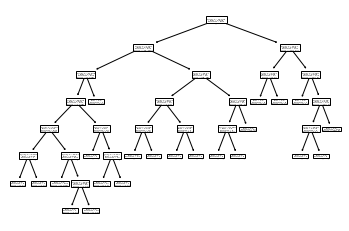

In [7]:
## Decision tree without privatization
clf = tree.DecisionTreeClassifier()
# clf = clf.fit(data_set['samples'], data_set['labels'])

tree.plot_tree(clf.fit(data_set['samples'], data_set['labels']))

In [4]:
## Privatization: Coin privatizer

# from privatizers import coinPrivatizer

# private_format = []

# for index, value in enumerate(data_set['samples']):
#     single_list = []
#     for num in value:
#         single_list.append(False if num == 0 else True)
#     single_list.append(False if data_set['labels'][index]==0 else True)
#     private_format.append(single_list)

# coin_privatizer = coinPrivatizer.CoinPrivatizer()
# private_format = coin_privatizer.privatize(private_format)

# private_data_set = {
#     'samples': [],
#     'labels': []
# }

# for value in private_format:
#     private_data_set['labels'].append(1 if value.pop() else 0)
#     single_list = []
#     for v in value:
#         single_list.append(1 if v else 0)
#     private_data_set['samples'].append(single_list)

# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(private_data_set['samples'], private_data_set['labels'])

# tree.plot_tree(clf.fit(private_data_set['samples'], private_data_set['labels']))

[Text(196.7684210526316, 203.85, 'X[22] <= 106.01\ngini = 0.468\nsamples = 569\nvalue = [212, 357]'),
 Text(123.34736842105264, 176.67000000000002, 'X[26] <= 0.374\ngini = 0.093\nsamples = 346\nvalue = [17, 329]'),
 Text(99.85263157894738, 149.49, 'X[13] <= 91.534\ngini = 0.031\nsamples = 318\nvalue = [5, 313]'),
 Text(88.10526315789474, 122.31, 'X[13] <= 48.929\ngini = 0.025\nsamples = 317\nvalue = [4, 313]'),
 Text(58.736842105263165, 95.13, 'X[20] <= 15.675\ngini = 0.019\nsamples = 314\nvalue = [3, 311]'),
 Text(35.242105263157896, 67.94999999999999, 'X[6] <= -0.03\ngini = 0.007\nsamples = 296\nvalue = [1, 295]'),
 Text(23.494736842105265, 40.77000000000001, 'X[14] <= 0.034\ngini = 0.095\nsamples = 20\nvalue = [1, 19]'),
 Text(11.747368421052633, 13.590000000000003, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]'),
 Text(35.242105263157896, 13.590000000000003, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(46.98947368421053, 40.77000000000001, 'gini = 0.0\nsamples = 276\nvalue = [0, 

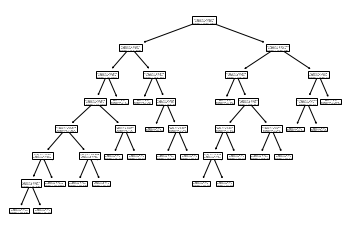

In [12]:
## Privatization: Laplace privatizer
from privatizers import laplacePrivatizer

scale = 0.03
privatizer = laplacePrivatizer.LaplacePrivatizer(scale)
privateData = privatizer.privatize(adapter.fromRaw(data_set['samples']))

privateTargetsFloat = privatizer.privatize(adapter.fromRaw(data_set['labels']))
privateTargets = adapter.toBinaryInt(privateTargetsFloat)

clf = tree.DecisionTreeClassifier()
tree.plot_tree(clf.fit(privateData, privateTargets))

In [ ]:
## Privatization: Exponential privatizer
from privatizers import exponentialPrivatizer

scale = 0.03
privatizer = exponentialPrivatizer.ExponentialPrivatizer(scale)
privateData = privatizer.privatize(adapter.fromRaw(data_set['samples']))

privateTargetsFloat = privatizer.privatize(adapter.fromRaw(data_set['labels']))
privateTargets = adapter.toBinaryInt(privateTargetsFloat)

clf = tree.DecisionTreeClassifier()

tree.plot_tree(clf.fit(privateData, privateTargets))